## Preprocesamiento paso a paso en Python

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "Cliente_ID": [1, 2, 3],
    "Edad": [25, 45, 30],
    "Ciudad": ["Madrid", "Barcelona", "Sevilla"],
    "Salario": [30000, 50000, None]
})

df

,Cliente_ID,Edad,Ciudad,Salario
0,1,25,Madrid,30000.0
1,2,45,Barcelona,50000.0
2,3,30,Sevilla,NaN


In [ ]:
# 1) Imputación: reemplazar NaN en Salario con la media
salario_media = df["Salario"].mean()
df["Salario"] = df["Salario"].fillna(salario_media)

In [ ]:
df

,Cliente_ID,Edad,Ciudad,Salario
0,1,25,Madrid,30000.0
1,2,45,Barcelona,50000.0
2,3,30,Sevilla,40000.0


In [ ]:
# 2) Codificación: One-Hot Encoding para Ciudad
from sklearn.preprocessing import StandardScaler

df = pd.get_dummies(df, columns=["Ciudad"], drop_first=False)

In [ ]:
df

,Cliente_ID,Edad,Salario,Ciudad_Barcelona,Ciudad_Madrid,Ciudad_Sevilla
0,1,25,30000.0,False,True,False
1,2,45,50000.0,True,False,False
2,3,30,40000.0,False,False,True


In [ ]:
# 3) Escalamiento: estandarizar Edad y Salario
scaler = StandardScaler()
df[["Edad", "Salario"]] = scaler.fit_transform(df[["Edad", "Salario"]])


In [ ]:
df

,Cliente_ID,Edad,Salario,Ciudad_Barcelona,Ciudad_Madrid,Ciudad_Sevilla
0,1,-0.980581,-1.224745,False,True,False
1,2,1.372813,1.224745,True,False,False
2,3,-0.392232,0.000000,False,False,True


## Ejemplo Práctico de Label Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({
    "Cliente_ID": [1, 2, 3],
    "Edad": [25, 45, 30],
    "Ciudad": ["Madrid", "Barcelona", "Sevilla"],
    "Salario": [30000, 50000, None]
})

df


,Cliente_ID,Edad,Ciudad,Salario
0,1,25,Madrid,30000.0
1,2,45,Barcelona,50000.0
2,3,30,Sevilla,NaN


In [ ]:
encoder = LabelEncoder()

df["Ciudad_codificada"] = encoder.fit_transform(df["Ciudad"])

print("Clases asignadas:", encoder.classes_)

Clases asignadas: ['Barcelona' 'Madrid' 'Sevilla']


In [ ]:
df

,Cliente_ID,Edad,Ciudad,Salario,Ciudad_codificada
0,1,25,Madrid,30000.0,1
1,2,45,Barcelona,50000.0,0
2,3,30,Sevilla,NaN,2


## Ejemplo Práctico de One-Hot Encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({
    "Cliente_ID": [1, 2, 3, 4],
    "Edad": [25, 45, 30, 45],
    "Ciudad": ["Madrid", "Barcelona", "Sevilla", "Madrid"],
    "Salario": [30000, 50000, None, 60000]
})
df

,Cliente_ID,Edad,Ciudad,Salario
0,1,25,Madrid,30000.0
1,2,45,Barcelona,50000.0
2,3,30,Sevilla,NaN
3,4,45,Madrid,60000.0


In [ ]:
# 1) Crear el encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# 2) Ajustar y transformar SOLO la columna categórica (Ciudad)
ciudad_ohe = ohe.fit_transform(df[["Ciudad"]])

# 3) Convertir a DataFrame con nombres de columnas
cols_ohe = ohe.get_feature_names_out(["Ciudad"])
df_ciudad_ohe = pd.DataFrame(ciudad_ohe, columns=cols_ohe, index=df.index)

# 4) Unir al df original (y opcionalmente eliminar "Ciudad")
df_ohe = pd.concat([df.drop(columns=["Ciudad"]), df_ciudad_ohe], axis=1)

print("Categorías:", ohe.categories_)

Categorías: [array(['Barcelona', 'Madrid', 'Sevilla'], dtype=object)]


In [ ]:
df_ohe

,Cliente_ID,Edad,Salario,Ciudad_Barcelona,Ciudad_Madrid,Ciudad_Sevilla
0,1,25,30000.0,0.0,1.0,0.0
1,2,45,50000.0,1.0,0.0,0.0
2,3,30,NaN,0.0,0.0,1.0
3,4,45,60000.0,0.0,1.0,0.0


## Creación de Variables Dummy

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 1) Dataset de ejemplo (una columna categórica)
df = pd.DataFrame({
    "Pais": ["USA", "Canada", "Germany", "Canada"]
})
df

,Pais
0,USA
1,Canada
2,Germany
3,Canada


In [ ]:
df = pd.get_dummies(df, columns=["Pais"], drop_first=True)

In [ ]:
df

,Pais_Germany,Pais_USA
0,False,True
1,False,False
2,True,False
3,False,False


## Live Coding

Vamos a trabajar con un dataset con múltiples problemas típicos de preprocesamiento: valores faltantes, variables categóricas y escalas distintas. Vamos a transformarlo y prepararlo para ser usado por un modelo.

0. Setup

In [ ]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

1. Cargar un dataset tabular






In [ ]:
df_original = pd.DataFrame({
    "Cliente_ID": [1, 2, 3, 3],                    # duplicado intencional
    "Edad":       [25, 45, 30, 30],
    "Ciudad":     ["Madrid", "Barcelona", "Sevilla", "Sevilla"],
    "Salario":    [30000, 50000, None, None]       # nulos intencionales
})
df_original

,Cliente_ID,Edad,Ciudad,Salario
0,1,25,Madrid,30000.0
1,2,45,Barcelona,50000.0
2,3,30,Sevilla,NaN
3,3,30,Sevilla,NaN


2. Detectar valores nulos y duplicados

In [ ]:
# Nulos por columna:
df_original.isnull().sum()

,0
Cliente_ID,0
Edad,0
Ciudad,0
Salario,2


In [ ]:
# Duplicados
df_original.duplicated().sum()

np.int64(1)

In [ ]:
# Eliminar duplicados
df = df_original.drop_duplicates().copy()

In [ ]:
df

,Cliente_ID,Edad,Ciudad,Salario
0,1,25,Madrid,30000.0
1,2,45,Barcelona,50000.0
2,3,30,Sevilla,NaN


3. Aplicar imputación con media/mediana

In [ ]:
# Calcular la mediana manualmente
mediana_salario = df["Salario"].median()

print("Mediana calculada:", mediana_salario)

# Reemplazar valores nulos
df["Salario"] = df["Salario"].fillna(mediana_salario)

Mediana calculada: 40000.0


In [ ]:
df

,Cliente_ID,Edad,Ciudad,Salario
0,1,25,Madrid,30000.0
1,2,45,Barcelona,50000.0
2,3,30,Sevilla,40000.0


4. Codificar variables categóricas con One-Hot

In [ ]:
# Devuelva una tabla normal (no comprimida) y que no falle si ve ciudades nuevas.
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Aprende qué ciudades existen en la columna y las convierte en una matriz de ceros y unos.
ciudad_ohe = ohe.fit_transform(df[["Ciudad"]])

# Recupera los nombres inteligentes para las nuevas columnas (ej: de 'Madrid' a 'Ciudad_Madrid').
cols_ohe = ohe.get_feature_names_out(["Ciudad"])

# Convierte esos ceros y unos en un DataFrame de Pandas, poniéndoles sus nombres y manteniendo el orden de las filas (index).
df_ciudad_ohe = pd.DataFrame(ciudad_ohe, columns=cols_ohe, index=df.index)

# Elimina la columna de texto original y concatena en su lugar las nuevas columnas de ceros y unos de lado a lado.
df_encoded = pd.concat([df.drop(columns=["Ciudad"]), df_ciudad_ohe], axis=1)

,Cliente_ID,Edad,Salario,Ciudad_Barcelona,Ciudad_Madrid,Ciudad_Sevilla
0,1,25,30000.0,0.0,1.0,0.0
1,2,45,50000.0,1.0,0.0,0.0
2,3,30,40000.0,0.0,0.0,1.0


5. Escalar variables numéricas con StandardScaler

In [ ]:
scaler = StandardScaler()
df_encoded[["Edad", "Salario"]] = scaler.fit_transform(df_encoded[["Edad", "Salario"]])

6. Mostrar el resultado final

In [ ]:
df_encoded

,Cliente_ID,Edad,Salario,Ciudad_Barcelona,Ciudad_Madrid,Ciudad_Sevilla
0,1,-0.980581,-1.224745,0.0,1.0,0.0
1,2,1.372813,1.224745,1.0,0.0,0.0
2,3,-0.392232,0.000000,0.0,0.0,1.0


7. Comparar con el dataset original


In [ ]:
df_original.head()

,Cliente_ID,Edad,Ciudad,Salario
0,1,25,Madrid,30000.0
1,2,45,Barcelona,50000.0
2,3,30,Sevilla,NaN
3,3,30,Sevilla,NaN


In [ ]:
df_encoded.head()

,Cliente_ID,Edad,Salario,Ciudad_Barcelona,Ciudad_Madrid,Ciudad_Sevilla
0,1,-0.980581,-1.224745,0.0,1.0,0.0
1,2,1.372813,1.224745,1.0,0.0,0.0
2,3,-0.392232,0.000000,0.0,0.0,1.0


## **PARTE 2**

## Gestión de Valores Faltantes: SimpleImputer

In [ ]:
df = pd.DataFrame({
    "Cliente_ID": [1, 2, 3, 3],                    # duplicado intencional
    "Edad":       [25, 45, 30, 30],
    "Ciudad":     ["Madrid", "Barcelona", "Sevilla", "Sevilla"],
    "Salario":    [30000, 50000, None, None]       # nulos intencionales
})
df

,Cliente_ID,Edad,Ciudad,Salario
0,1,25,Madrid,30000.0
1,2,45,Barcelona,50000.0
2,3,30,Sevilla,NaN
3,3,30,Sevilla,NaN


In [ ]:
imputer_num = SimpleImputer(strategy="median")
df[["Salario"]] = imputer_num.fit_transform(df[["Salario"]])

In [ ]:
df[["Salario"]]

,Salario
0,30000.0
1,50000.0
2,40000.0
3,40000.0


## Pipelines de Preprocesamiento

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Dataset
df = pd.DataFrame({
    "Edad": [25, 45, 30],
    "Ciudad": ["Madrid", "Barcelona", "Sevilla"],
    "Salario": [30000, 50000, None]
})

print("Dataset original:")
df

Dataset original:


,Edad,Ciudad,Salario
0,25,Madrid,30000.0
1,45,Barcelona,50000.0
2,30,Sevilla,NaN


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Definir qué columnas son numéricas y cuáles categóricas
# Este paso es importante porque cada tipo de dato necesita un tratamiento distinto.
# Numéricas: imputar + escalar
# Categóricas: codificar (one-hot)
num_cols = ["Edad", "Salario"]
cat_cols = ["Ciudad"]

# Pipeline numérico
# imputer: si falta Salario, lo reemplaza por la mediana
# scaler: estandariza Edad y Salario (z-score)
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline categórico
# OneHotEncoder crea columnas tipo:
# Ciudad_Barcelona
# Ciudad_Madrid
# Ciudad_Sevilla
cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    #handle_unknown="ignore" si aparece una ciudad nueva en producción, no rompe el proceso.
])

# El ColumnTransformer dice:
# A estas columnas numéricas aplícales num_pipeline
# A estas columnas categóricas aplícales cat_pipeline
# Y al final junta todo en una sola matriz de features
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

# Aplicar el preprocesamiento
df_pipeline = preprocessor.fit_transform(df)

print("\nResultado con Pipeline:")
print(df_pipeline)


Resultado con Pipeline:
[[-0.98058068 -1.22474487  0.          1.          0.        ]
 [ 1.37281295  1.22474487  1.          0.          0.        ]
 [-0.39223227  0.          0.          0.          1.        ]]


In [ ]:
df_pipeline

array([[-0.98058068, -1.22474487,  0.        ,  1.        ,  0.        ],
       [ 1.37281295,  1.22474487,  1.        ,  0.        ,  0.        ],
       [-0.39223227,  0.        ,  0.        ,  0.        ,  1.        ]])

In [ ]:
import pandas as pd

# nombres de columnas (numéricas pasan, categóricas se expanden)
feature_names = preprocessor.get_feature_names_out()
df_pipeline_df = pd.DataFrame(df_pipeline, columns=feature_names)

df_pipeline_df

,num__Edad,num__Salario,cat__Ciudad_Barcelona,cat__Ciudad_Madrid,cat__Ciudad_Sevilla
0,-0.980581,-1.224745,0.0,1.0,0.0
1,1.372813,1.224745,1.0,0.0,0.0
2,-0.392232,0.000000,0.0,0.0,1.0


## Ejemplo Práctico de Cálculo de Distancia

=== Distancias SIN escalamiento ===
Euclidiana: 20000.005625
Manhattan : 20015.000000

=== Distancias CON escalamiento (StandardScaler) ===
Euclidiana: 2.828427
Manhattan : 4.000000


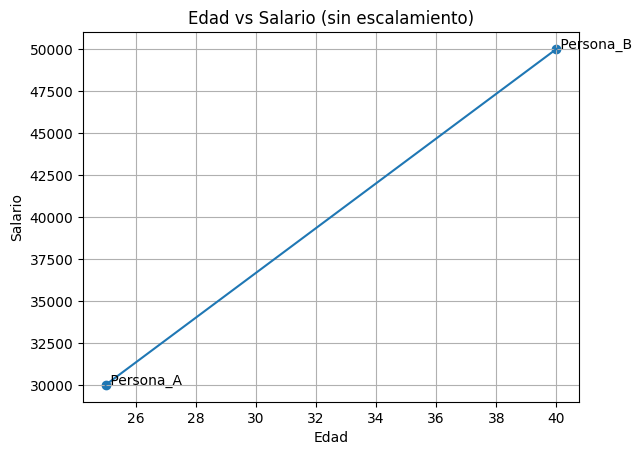

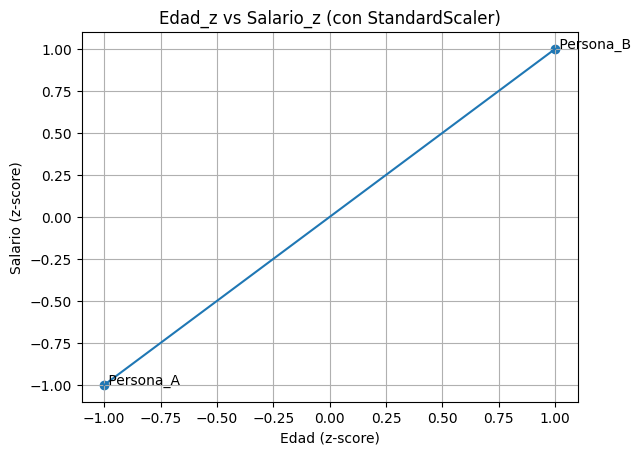

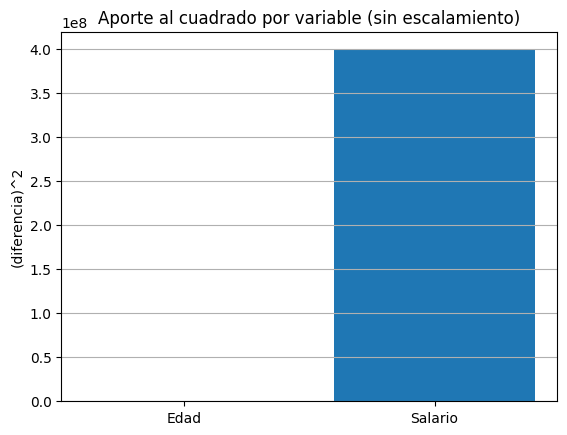

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 1) Datos (dos observaciones)
# -----------------------------
df = pd.DataFrame({
    "Edad": [25, 40],
    "Salario": [30000, 50000]
}, index=["Persona_A", "Persona_B"])

a = df.loc["Persona_A"].to_numpy()
b = df.loc["Persona_B"].to_numpy()

# Distancias sin escalamiento
dist_euclid = np.linalg.norm(a - b)
dist_manhattan = np.sum(np.abs(a - b))

print("=== Distancias SIN escalamiento ===")
print(f"Euclidiana: {dist_euclid:.6f}")
print(f"Manhattan : {dist_manhattan:.6f}")

# -----------------------------
# 2) Escalamiento
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X_scaled, columns=df.columns, index=df.index)

a_s = df_scaled.loc["Persona_A"].to_numpy()
b_s = df_scaled.loc["Persona_B"].to_numpy()

# Distancias con escalamiento
dist_euclid_s = np.linalg.norm(a_s - b_s)
dist_manhattan_s = np.sum(np.abs(a_s - b_s))

print("\n=== Distancias CON escalamiento (StandardScaler) ===")
print(f"Euclidiana: {dist_euclid_s:.6f}")
print(f"Manhattan : {dist_manhattan_s:.6f}")

# -----------------------------
# 3) Gráfico 1: Sin escalamiento
# -----------------------------
plt.figure()
plt.scatter(df["Edad"], df["Salario"])
for name, row in df.iterrows():
    plt.text(row["Edad"], row["Salario"], f" {name}")

# Línea entre puntos
plt.plot(df["Edad"], df["Salario"])

plt.title("Edad vs Salario (sin escalamiento)")
plt.xlabel("Edad")
plt.ylabel("Salario")
plt.grid(True)
plt.show()

# -----------------------------
# 4) Gráfico 2: Con escalamiento
# -----------------------------
plt.figure()
plt.scatter(df_scaled["Edad"], df_scaled["Salario"])
for name, row in df_scaled.iterrows():
    plt.text(row["Edad"], row["Salario"], f" {name}")

plt.plot(df_scaled["Edad"], df_scaled["Salario"])

plt.title("Edad_z vs Salario_z (con StandardScaler)")
plt.xlabel("Edad (z-score)")
plt.ylabel("Salario (z-score)")
plt.grid(True)
plt.show()

# -----------------------------
# 5) Gráfico 3: Aporte al cuadrado (sin escalamiento)
# -----------------------------
diff = a - b
contrib_sq = diff**2  # lo que entra dentro de la Euclidiana: (ΔEdad)^2 y (ΔSalario)^2

plt.figure()
plt.bar(df.columns, contrib_sq)
plt.title("Aporte al cuadrado por variable (sin escalamiento)")
plt.ylabel("(diferencia)^2")
plt.grid(True, axis="y")
plt.show()

## Live Coding 2

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy.spatial.distance import euclidean, cityblock  # euclidiana y manhattan

1. Cargar un dataset de ejemplo


In [ ]:
df = pd.DataFrame({
    "Usuario_ID": [101, 102, 103, 104, 105],
    "Edad": [22, 45, 31, 28, 60],
    "Visitas_Semana": [3, 1, 5, 2, 0],
    "Gasto_Mensual": [12000, 250000, None, 45000, 900000],  # distinto rango + nulo
    "Ciudad": ["Santiago", "Valparaíso", "Santiago", "Concepción", "Santiago"],
    "Plan": ["Free", "Premium", "Free", "Standard", "Premium"]
})
df

,Usuario_ID,Edad,Visitas_Semana,Gasto_Mensual,Ciudad,Plan
0,101,22,3,12000.0,Santiago,Free
1,102,45,1,250000.0,Valparaíso,Premium
2,103,31,5,NaN,Santiago,Free
3,104,28,2,45000.0,Concepción,Standard
4,105,60,0,900000.0,Santiago,Premium


2. Separar columnas numéricas y categóricas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Usuario_ID      5 non-null      int64  
 1   Edad            5 non-null      int64  
 2   Visitas_Semana  5 non-null      int64  
 3   Gasto_Mensual   4 non-null      float64
 4   Ciudad          5 non-null      object 
 5   Plan            5 non-null      object 
dtypes: float64(1), int64(3), object(2)
memory usage: 372.0+ bytes


In [ ]:
num_cols = ["Edad", "Visitas_Semana", "Gasto_Mensual"]
cat_cols = ["Ciudad", "Plan"]

In [ ]:
df["Plan"].value_counts()

,count
Plan,
Free,2
Premium,2
Standard,1


In [ ]:
df["Ciudad"].value_counts()

,count
Ciudad,
Santiago,3
Valparaíso,1
Concepción,1


3. Definir imputadores y codificadores

In [ ]:
df.isnull().sum()

,0
Usuario_ID,0
Edad,0
Visitas_Semana,0
Gasto_Mensual,1
Ciudad,0
Plan,0


In [ ]:
df["Gasto_Mensual"] = df["Gasto_Mensual"].fillna(df["Gasto_Mensual"].median())
df

,Usuario_ID,Edad,Visitas_Semana,Gasto_Mensual,Ciudad,Plan
0,101,22,3,12000.0,Santiago,Free
1,102,45,1,250000.0,Valparaíso,Premium
2,103,31,5,147500.0,Santiago,Free
3,104,28,2,45000.0,Concepción,Standard
4,105,60,0,900000.0,Santiago,Premium


In [ ]:
num_pipeline = Pipeline([("scaler", StandardScaler())])

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

cat_pipeline = Pipeline([("encoder", ohe)])

4. Combinar todo en un ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

5. Enlazarlo a un Pipeline

6. Aplicar fit_transform al dataset

In [ ]:
df_pipeline = preprocessor.fit_transform(df)

print("\nShape final (después de escalar + one-hot):", df_pipeline.shape)


Shape final (después de escalar + one-hot): (5, 7)


In [ ]:
# nombres de columnas (numéricas pasan, categóricas se expanden)
feature_names = preprocessor.get_feature_names_out()
df_pipeline_df = pd.DataFrame(df_pipeline, columns=feature_names)

df_pipeline_df

,num__Edad,num__Visitas_Semana,num__Gasto_Mensual,cat__Ciudad_Santiago,cat__Ciudad_Valparaíso,cat__Plan_Premium,cat__Plan_Standard
0,-1.111653,0.464991,-0.795587,1.0,0.0,0.0,0.0
1,0.570454,-0.697486,-0.064225,0.0,1.0,1.0,0.0
2,-0.453437,1.627467,-0.379202,1.0,0.0,0.0,0.0
3,-0.672843,-0.116248,-0.694180,0.0,0.0,0.0,1.0
4,1.667479,-1.278724,1.933193,1.0,0.0,1.0,0.0


7. Calcular distancias entre observaciones con y sin escalado

In [ ]:
df

,Usuario_ID,Edad,Visitas_Semana,Gasto_Mensual,Ciudad,Plan
0,101,22,3,12000.0,Santiago,Free
1,102,45,1,250000.0,Valparaíso,Premium
2,103,31,5,147500.0,Santiago,Free
3,104,28,2,45000.0,Concepción,Standard
4,105,60,0,900000.0,Santiago,Premium


**Distancias (solo numéricas) SIN escalado**

In [ ]:
i, j = 0, 1  # i y j son índices de filas (0 = primera fila, 1 = segunda)

# Extraer solo las columnas numéricas de la fila i y j
p1_raw = df.loc[i, num_cols].to_numpy(dtype=float)
p2_raw = df.loc[j, num_cols].to_numpy(dtype=float)
# df.loc[i, num_cols] significa:
#   “toma la fila i”
#   “pero solo en las columnas listadas en num_cols” (["Edad","Visitas_Semana","Gasto_Mensual"])
# .to_numpy(dtype=float) lo convierte a un arreglo tipo NumPy, con números float.
#    Esto es clave porque las funciones de distancia trabajan con arrays numéricos.

print("p1_raw:", p1_raw.tolist())
print("p2_raw:", p2_raw.tolist())

p1_raw: [22.0, 3.0, 12000.0]
p2_raw: [45.0, 1.0, 250000.0]


=> Son 2 puntos en un espacio de 3 dimensiones.

In [ ]:
print("Euclidiana:", euclidean(p1_raw, p2_raw))
print("Manhattan :", cityblock(p1_raw, p2_raw))

Euclidiana: 238000.0011197479
Manhattan : 238025.0


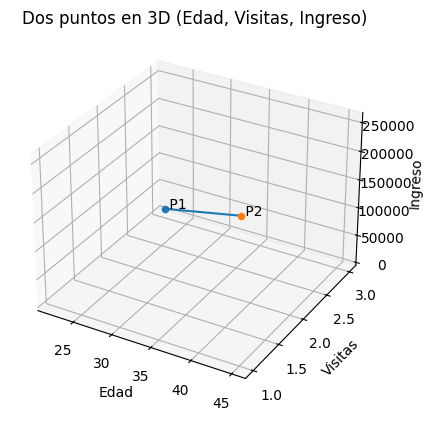

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p1 = np.array([22.0, 3.0, 12000.0])
p2 = np.array([45.0, 1.0, 250000.0])

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# puntos
ax.scatter(p1[0], p1[1], p1[2])
ax.scatter(p2[0], p2[1], p2[2])

# etiquetas
ax.text(p1[0], p1[1], p1[2], " P1")
ax.text(p2[0], p2[1], p2[2], " P2")

# línea entre puntos
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]])

ax.set_xlabel("Edad")
ax.set_ylabel("Visitas")
ax.set_zlabel("Ingreso")
ax.set_title("Dos puntos en 3D (Edad, Visitas, Ingreso)")

plt.show()

**Distancia SOLO numérica, CON escalado**

In [ ]:
df_pipeline_df

,num__Edad,num__Visitas_Semana,num__Gasto_Mensual,cat__Ciudad_Santiago,cat__Ciudad_Valparaíso,cat__Plan_Premium,cat__Plan_Standard
0,-1.111653,0.464991,-0.795587,1.0,0.0,0.0,0.0
1,0.570454,-0.697486,-0.064225,0.0,1.0,1.0,0.0
2,-0.453437,1.627467,-0.379202,1.0,0.0,0.0,0.0
3,-0.672843,-0.116248,-0.694180,0.0,0.0,0.0,1.0
4,1.667479,-1.278724,1.933193,1.0,0.0,1.0,0.0


In [ ]:
num_cols

['Edad', 'Visitas_Semana', 'Gasto_Mensual']

In [ ]:
# Las primeras columnas de df_pipeline corresponden a num_cols escaladas
X_num_scaled = df_pipeline[:, :len(num_cols)] # Corrected line
X_num_scaled

array([[-1.11165298,  0.46499055, -0.795587  ],
       [ 0.57045351, -0.69748583, -0.06422467],
       [-0.4534374 ,  1.62746694, -0.37920215],
       [-0.6728426 , -0.11624764, -0.69417962],
       [ 1.66747948, -1.27872403,  1.93319345]])

In [ ]:
p1_scaled = X_num_scaled[i]
p2_scaled = X_num_scaled[j]

p1_scaled, p2_scaled

(array([-1.11165298,  0.46499055, -0.795587  ]),
 array([ 0.57045351, -0.69748583, -0.06422467]))

In [ ]:
print("Euclidiana:", euclidean(p1_scaled, p2_scaled))
print("Manhattan :", cityblock(p1_scaled, p2_scaled))

Euclidiana: 2.1715718839707616
Manhattan : 3.57594520423245


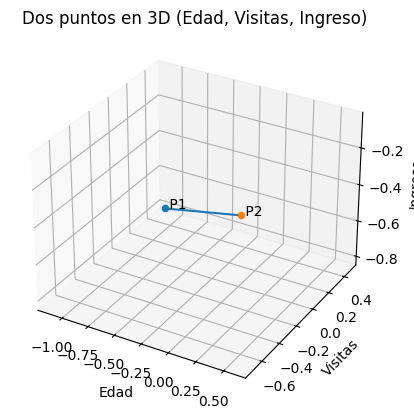

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p1 = np.array([-1.11165298,  0.46499055, -0.795587  ])
p2 = np.array([0.57045351, -0.69748583, -0.06422467])

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# puntos
ax.scatter(p1[0], p1[1], p1[2])
ax.scatter(p2[0], p2[1], p2[2])

# etiquetas
ax.text(p1[0], p1[1], p1[2], " P1")
ax.text(p2[0], p2[1], p2[2], " P2")

# línea entre puntos
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]])

ax.set_xlabel("Edad")
ax.set_ylabel("Visitas")
ax.set_zlabel("Ingreso")
ax.set_title("Dos puntos en 3D (Edad, Visitas, Ingreso)")

plt.show()

## Ejercicio 2

In [121]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from scipy.spatial.distance import euclidean, cityblock

import matplotlib.pyplot as plt

In [122]:
# =========================
# 1) Generar y cargar dataset "banco"
# =========================
df = pd.DataFrame({
    "Cliente_ID": [101, 102, 103, 104, 105, 106],
    "Edad": [22, 45, 31, 28, np.nan, 40],
    "Visitas_Semana": [3, 1, 5, 2, 0, np.nan],
    "Gasto_Mensual": [12000, 250000, 80000, np.nan, 15000, 60000],
    "Ciudad": ["Santiago", "Valparaíso", "Santiago", "Concepción", "Santiago", None],
    "Plan": ["Standard", "Premium", "Standard", "Standard", "Premium", "Premium"]
})

df

,Cliente_ID,Edad,Visitas_Semana,Gasto_Mensual,Ciudad,Plan
0,101,22.0,3.0,12000.0,Santiago,Standard
1,102,45.0,1.0,250000.0,Valparaíso,Premium
2,103,31.0,5.0,80000.0,Santiago,Standard
3,104,28.0,2.0,NaN,Concepción,Standard
4,105,NaN,0.0,15000.0,Santiago,Premium
5,106,40.0,NaN,60000.0,None,Premium


In [123]:
# =========================
# 2) Identificar columnas numéricas y categóricas
# =========================
num_cols = ["Edad", "Visitas_Semana", "Gasto_Mensual"]
cat_cols = ["Ciudad", "Plan"]

In [124]:
df_imputed = df.copy()

In [125]:
# =========================
# 4) ColumnTransformer (OneHot + StandardScaler)
#    - numéricas: StandardScaler
#    - categóricas: imputación + OneHotEncoder
# =========================
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(missing_values=None, strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop"
)

pipeline = Pipeline(steps=[
    ("preprocess", preprocess)
])

In [126]:
# =========================
# 5) Aplicar fit_transform al dataset (procesado final)
# =========================
X_processed = pipeline.fit_transform(df_imputed)

# Recuperar nombres de features (para enseñar y graficar bonito)
feature_names_num = [f"num__{c}" for c in num_cols]
ohe = pipeline.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]

cat_feature_names = ohe.get_feature_names_out(cat_cols)
feature_names_cat = [f"cat__{n}" for n in cat_feature_names]


feature_names = feature_names_num + feature_names_cat
df_pipeline_df = pd.DataFrame(X_processed, columns=feature_names)

df_pipeline_df

,num__Edad,num__Visitas_Semana,num__Gasto_Mensual,cat__Ciudad_Concepción,cat__Ciudad_Santiago,cat__Ciudad_Valparaíso,cat__Plan_Premium,cat__Plan_Standard
0,-1.424877,0.529999,-0.842134,0.0,1.0,0.0,0.0,1.0
1,1.600246,-0.741999,2.127169,0.0,0.0,1.0,1.0,0.0
2,-0.241133,1.801996,0.006238,0.0,1.0,0.0,0.0,1.0
3,-0.635714,-0.106000,-0.243283,1.0,0.0,0.0,0.0,1.0
4,-0.241133,-1.377997,-0.804706,0.0,1.0,0.0,1.0,0.0
5,0.942611,-0.106000,-0.243283,0.0,1.0,0.0,1.0,0.0


In [105]:
# =========================
# 6) Elegir dos observaciones y calcular distancias
# =========================
i, j = 0, 1  # cambia esto en vivo en clase (por ejemplo 2,3)

# (A) Distancia SOLO numérica, SIN escalado (pero ya imputado manual)
p1_raw = df_imputed.loc[i, num_cols].to_numpy(dtype=float)
p2_raw = df_imputed.loc[j, num_cols].to_numpy(dtype=float)

print("\n=== Distancias (solo numéricas) SIN escalado ===")
print("p1_raw:", p1_raw.tolist())
print("p2_raw:", p2_raw.tolist())
print("Euclidiana:", euclidean(p1_raw, p2_raw))
print("Manhattan :", cityblock(p1_raw, p2_raw))


=== Distancias (solo numéricas) SIN escalado ===
p1_raw: [22.0, 3.0, 12000.0]
p2_raw: [45.0, 1.0, 250000.0]
Euclidiana: 238000.0011197479
Manhattan : 238025.0


In [106]:
# (B) Distancia SOLO numérica, CON escalado
X_num_scaled = X_processed[:, :len(num_cols)]  # primeras columnas: num escaladas
p1_scaled = X_num_scaled[i]
p2_scaled = X_num_scaled[j]

print("\n=== Distancias (solo numéricas) CON escalado ===")
print("p1_scaled:", p1_scaled.tolist())
print("p2_scaled:", p2_scaled.tolist())
print("Euclidiana:", euclidean(p1_scaled, p2_scaled))
print("Manhattan :", cityblock(p1_scaled, p2_scaled))


=== Distancias (solo numéricas) CON escalado ===
p1_scaled: [-1.4248768040695972, 0.52999894000318, -0.8421341700931153]
p2_scaled: [1.6002462568781624, -0.7419985160044519, 2.1271685333463135]
Euclidiana: 4.425619234256437
Manhattan : 7.26642322039482
